In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




## Matplotlib/Seaborn/Plotly

* Скачайте любой табличный датасет (можете использовать тот же, что и в предыдущих занятиях), например, с https://www.kaggle.com/datasets
* Постройте на основе вашего датасета различные типы графиков: гистограммы, ящик с усами, тепловая карта, диаграммы рассеяния, barplot
* Не ограничивайтесь только вышеописанными типами графиков, посмотрите, что еще предлагают библиотеки: круговые диаграммы, скрипичные диаграммы и др. 
* Меняйте цветовфе схемы и обязательно добавляйте подпсии осей и графиков, чтобы всем было понятно, что изображено!
* Мы можете использовать одну библиотеку, если хотите поглубже разобраться с ней, или попробовать разные и определиться, что вам удобнее.

### Удачи!

### Загрузка и обзор данных

In [39]:
df = pd.read_csv('/content/drive/MyDrive/cars.csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56244 non-null  object 
 1   model                56244 non-null  object 
 2   priceUSD             56244 non-null  int64  
 3   year                 56244 non-null  int64  
 4   condition            56244 non-null  object 
 5   mileage(kilometers)  56244 non-null  float64
 6   fuel_type            56244 non-null  object 
 7   volume(cm3)          56197 non-null  float64
 8   color                56244 non-null  object 
 9   transmission         56244 non-null  object 
 10  drive_unit           54339 non-null  object 
 11  segment              50953 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.1+ MB


In [41]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


### Pairplot

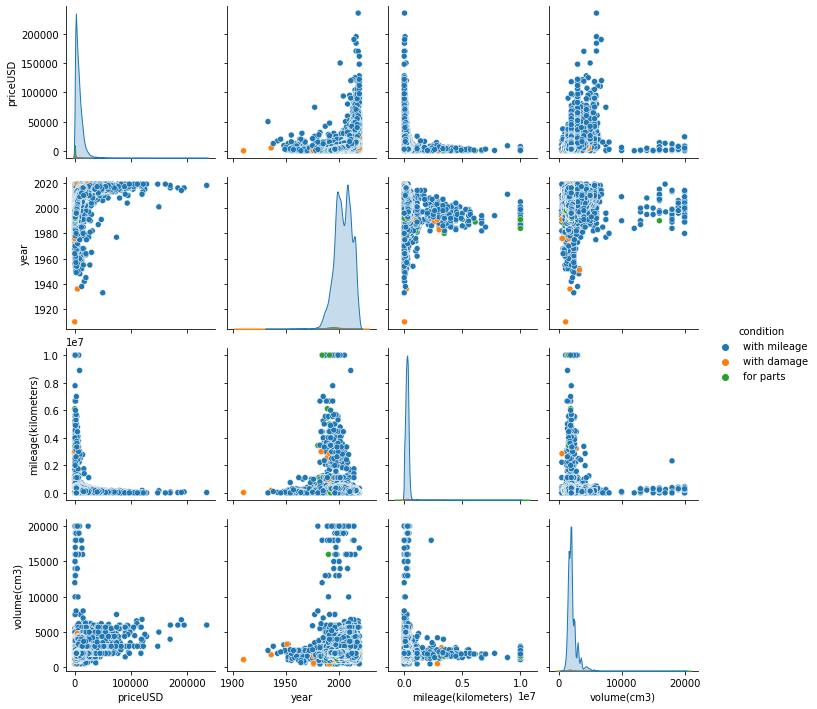

In [42]:
sns.pairplot(df, hue='condition')

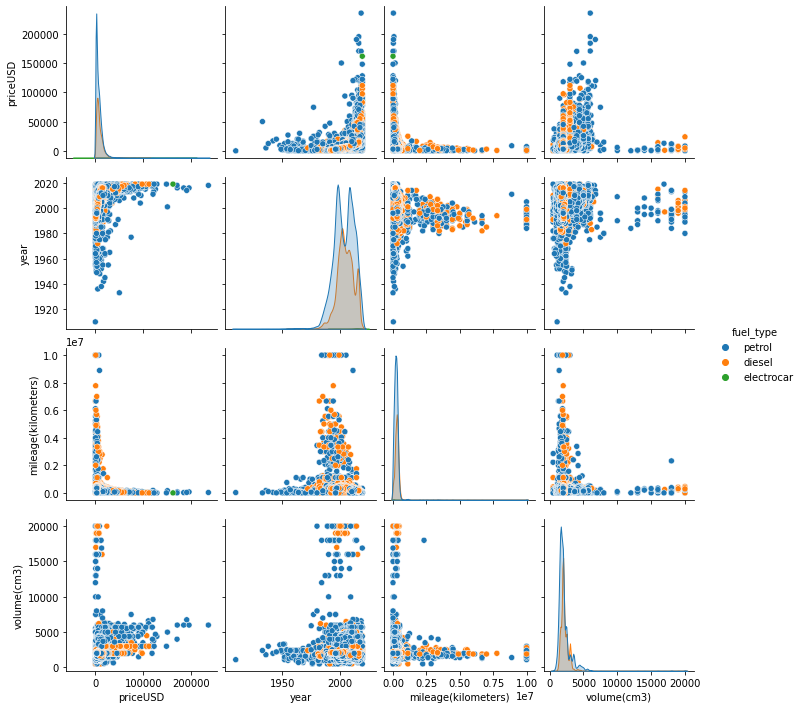

In [43]:
sns.pairplot(df, hue='fuel_type')

### Scatter plot (диаграмма рассеяния)

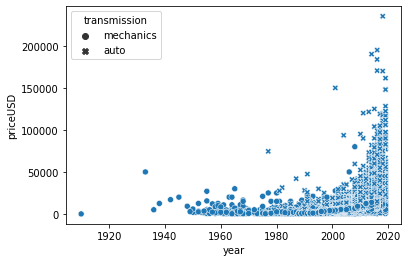

In [44]:
 sns.scatterplot(data=df, x=df.year, y=df.priceUSD, style='transmission', palette='deep')

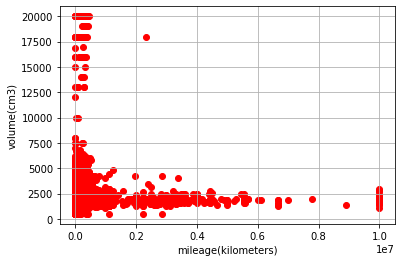

In [45]:
plt.scatter(df['mileage(kilometers)'], df['volume(cm3)'], color='red')
plt.xlabel('mileage(kilometers)')
plt.ylabel('volume(cm3)')
plt.grid()
plt.show()

### Line plot (линейный график)

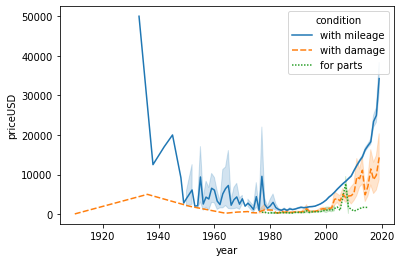

In [46]:
sns.lineplot(data=df, x=df.year, y=df.priceUSD, hue='condition', style='condition')

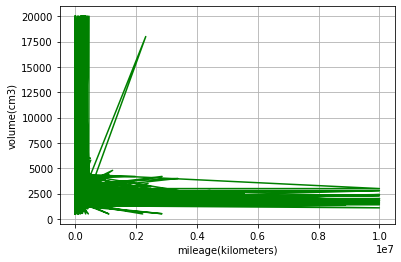

In [47]:
plt.plot(df['mileage(kilometers)'], df['volume(cm3)'], color='green')
plt.xlabel('mileage(kilometers)')
plt.ylabel('volume(cm3)')
plt.grid()
plt.show()

### Histplot (гистограмма)

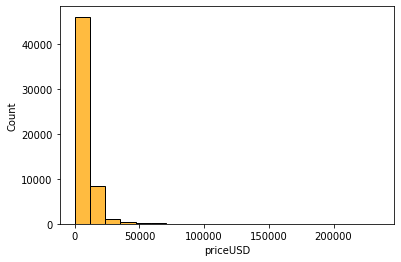

In [48]:
sns.histplot(df['priceUSD'], bins=20, color='orange')

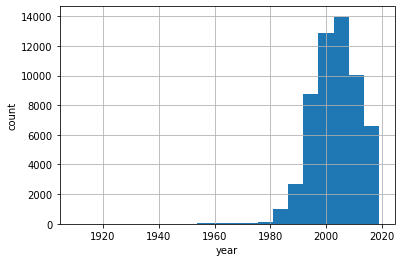

In [49]:
plt.hist(df.year, bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.grid()
plt.show()

### Boxplot (ящик с усами)

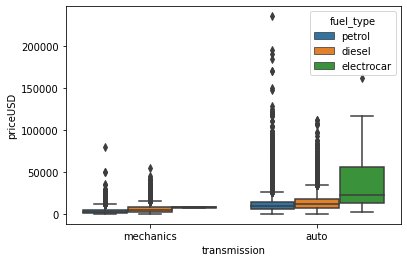

In [50]:
sns.boxplot(x=df.transmission, y=df.priceUSD, data=df, hue='fuel_type')

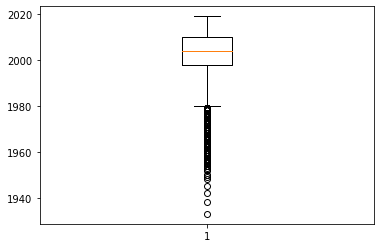

In [51]:
plt.boxplot(df[df['condition'] == 'with mileage'].year)
plt.show()

### Barplot

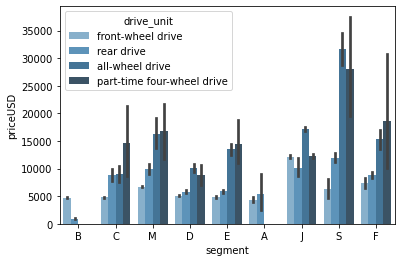

In [52]:
sns.barplot(x='segment', y='priceUSD', hue='drive_unit', data=df, palette='Blues_d')

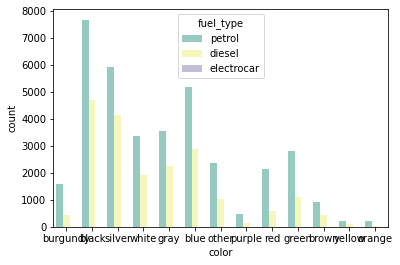

In [53]:
sns.countplot(x='color', hue='fuel_type', data=df, palette='Set3')

### Heatmap (тепловая карта)

In [54]:
df.corr()

,priceUSD,year,mileage(kilometers),volume(cm3)
priceUSD,1.000000,0.605131,-0.170933,0.267553
year,0.605131,1.000000,-0.233049,0.027370
mileage(kilometers),-0.170933,-0.233049,1.000000,0.013452
volume(cm3),0.267553,0.027370,0.013452,1.000000


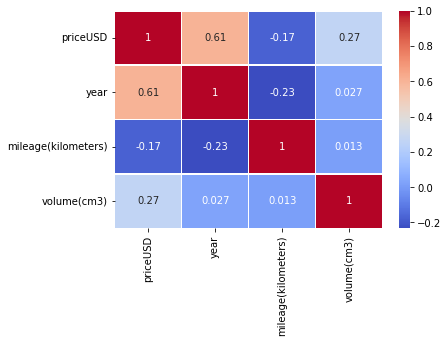

In [55]:
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='coolwarm')

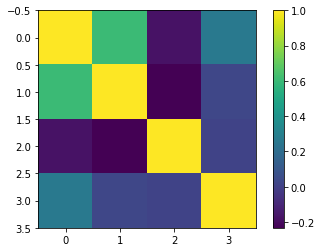

In [56]:
plt.imshow(df.corr())
plt.colorbar()

### Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



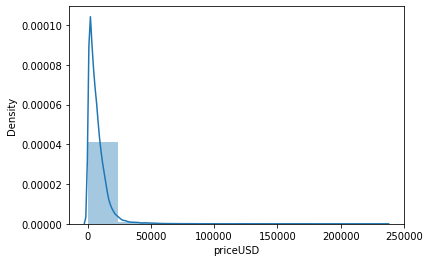

In [57]:
sns.distplot(df['priceUSD'], bins=10);

### Kde plot

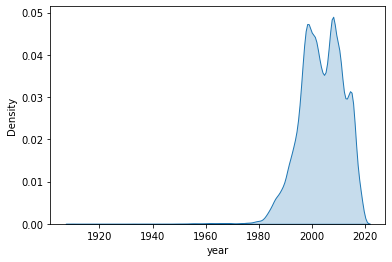

In [58]:
sns.kdeplot(df['year'], shade=True, legend=True)

### Jointplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



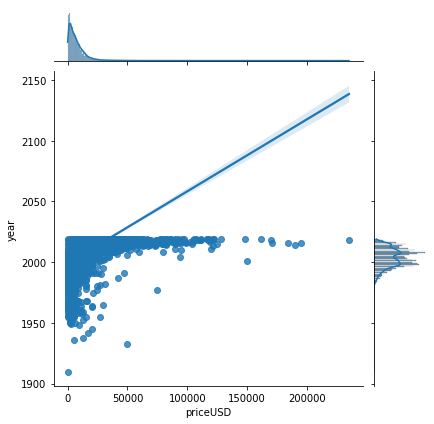

In [59]:
sns.jointplot(df.priceUSD, df.year, kind='reg')
plt.show()

### Violinplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



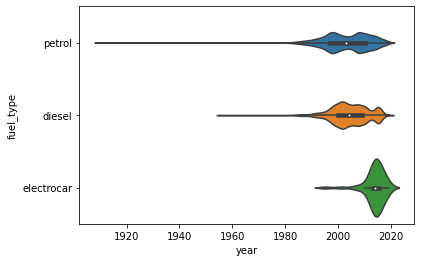

In [60]:
sns.violinplot(df['year'], df['fuel_type'])

### Plotly

In [61]:
px.histogram(df, x="priceUSD", y="year")

In [62]:
px.histogram(df, x="priceUSD", color="color")

In [63]:
px.box(df, x="transmission", y="year")

In [64]:
px.box(df,x='transmission', y='priceUSD', color='fuel_type')